### Описание задачи

Вам необходимо разработать прогноз продаж для туроператора, продающего туры в Объединенные Арабские Эмираты с помощью статистических методов. 

### Дано

* Туроператор «ОАЭ Тур» продает туры в ОАЭ на своем сайте;
* Единственным каналом продвижения является SEO в Яндексе. Единственным поисковым запросом, по которому оптимизирован сайт, является «туры в оаэ»;
* У «ОАЭ Тур» есть только один конкурент;
* Основной фактор конкуренции – это цена;
* Имеется статистика по средним ценам ну тур у «ОАЭ Тур» и конкурента, а также количеству заказов «ОАЭ Тур», в недельном разрезе;


### Цели

1.	Определить ключевой рыночный фактор, позволяющий релевантно оценить рыночный спрос на туры в ОАЭ в целом по рынку;
2.	Найти значение этого фактора понедельно на весь период наблюдений;
3.	Сформировать модель, описывающую зависимость между спросом, ценами и количеством заказов. Привести обоснование модели;
4.	С помощью нее рассчитать понедельный прогноз продаж на тестовый период;

In [1]:
import pandas as pd
import os
os.listdir()
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import product
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
plt.style.use('fivethirtyeight')

C:\Users\ilya\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('../input/uae.csv',',', index_col=['date'], parse_dates=['date'])

### Для удобства построения предиктивной модели я оставил только первый день каждого недельного периода

In [4]:
df

,mean_uae,mean_com,sales
date,,,
2018-03-12,103197.80,125185.20,197.0
2018-03-19,107808.30,111489.70,155.0
2018-03-26,92518.58,98027.54,124.0
2018-04-02,80068.75,98274.79,131.0
2018-04-09,97560.45,128452.00,109.0
2018-04-16,93533.10,97903.89,83.0
2018-04-23,105465.40,111031.70,70.0
2018-04-30,103581.30,109069.90,56.0
2018-05-07,82913.93,106719.10,65.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2018-03-12 to 2019-03-04
Data columns (total 3 columns):
mean_uae    52 non-null float64
mean_com    52 non-null float64
sales       42 non-null float64
dtypes: float64(3)
memory usage: 1.6 KB


###  Выделяю только промежутки, где известно кол-во продаж

In [6]:
df = df.iloc[:42, :]

In [7]:
df

,mean_uae,mean_com,sales
date,,,
2018-03-12,103197.80,125185.20,197.0
2018-03-19,107808.30,111489.70,155.0
2018-03-26,92518.58,98027.54,124.0
2018-04-02,80068.75,98274.79,131.0
2018-04-09,97560.45,128452.00,109.0
2018-04-16,93533.10,97903.89,83.0
2018-04-23,105465.40,111031.70,70.0
2018-04-30,103581.30,109069.90,56.0
2018-05-07,82913.93,106719.10,65.0


### Создаю предиктивную модель

In [13]:
y = df.sales

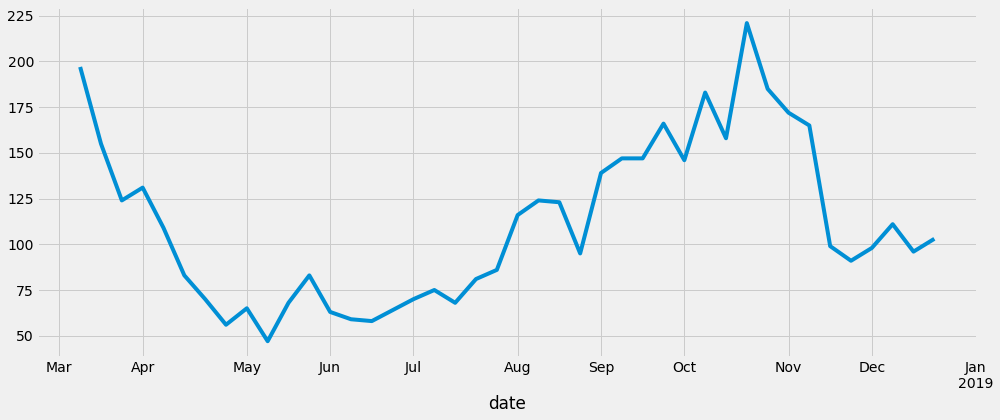

In [14]:
y.plot(figsize=(15, 6))
plt.show()

###  На графике чётко проcлеживается тренд и сезонность.

### Ключевой фактор на спрос в целом по данному рынку - сезонность. Летом в ОАЭ очень жарко, зимой недостатьчно тепло, поэтому клиенты предпочитают посещать его весной-осенью

### Для прогнозирования временных рядов использую модель ARIMA

### Выбираю лучшую комбинацию p, d, q, s

p – порядок авторегрессии
d – порядок интегрирования
q – порядок скользящего среднего
s - периодичность временного ряда (4 - квартальные периоды, 12 - годовые)

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
            results = mod.fit()
                                
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1233.650353812109
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:343.25277249100407
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1168.91861172427
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:206.51391314607267
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:453.41195271878576
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2101.618859488177
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:297.8521454152216
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:324.82821988835275
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2631.4477460517155
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:196.41224273543403
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1191.9980534443189
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:271.54521116349224
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1284.2278708713454
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:170.84874799895135
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:357.0481136338143
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1145.489716937382
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:265.4993825222241
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:271.7365622445429
A

### ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:158.40000665074507 - оптимальная модель по показателю AIC

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
order=(1, 1, 0),
seasonal_order=(1, 1, 0, 12),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1427      0.349      0.408      0.683      -0.542       0.827
ar.S.L12      -0.9351      0.515     -1.815      0.070      -1.945       0.075
sigma2       802.0108    350.589      2.288      0.022     114.868    1489.153


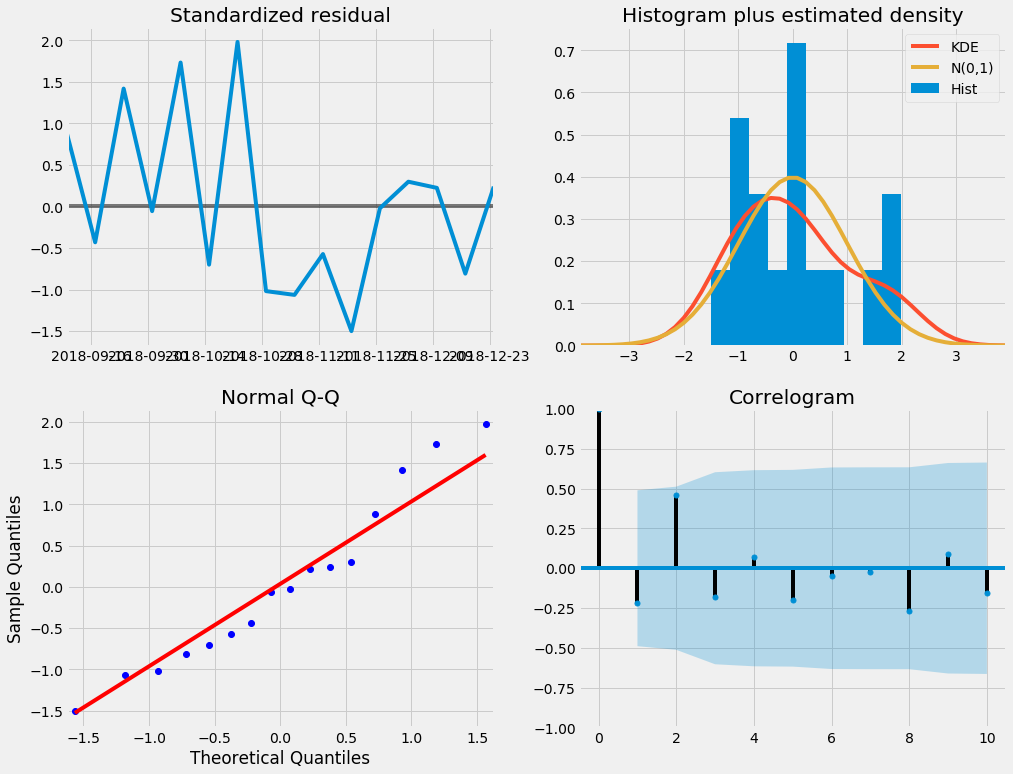

In [18]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### Прогнозирование временных рядов

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2018-9-24'), dynamic=False)
pred_ci = pred.conf_int()

### Пошаговое прогнозирование

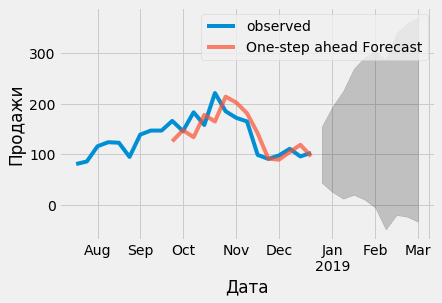

In [50]:
ax = y['2018-07-23':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Дата')
ax.set_ylabel('Продажи')
plt.legend()
plt.show()

In [55]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-11-12':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Среднеквадратическая ошибка {}'.format(round(mse, 2)))

Среднеквадратическая ошибка 392.87


### Динамическое прогнозирование

In [52]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-9-24'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

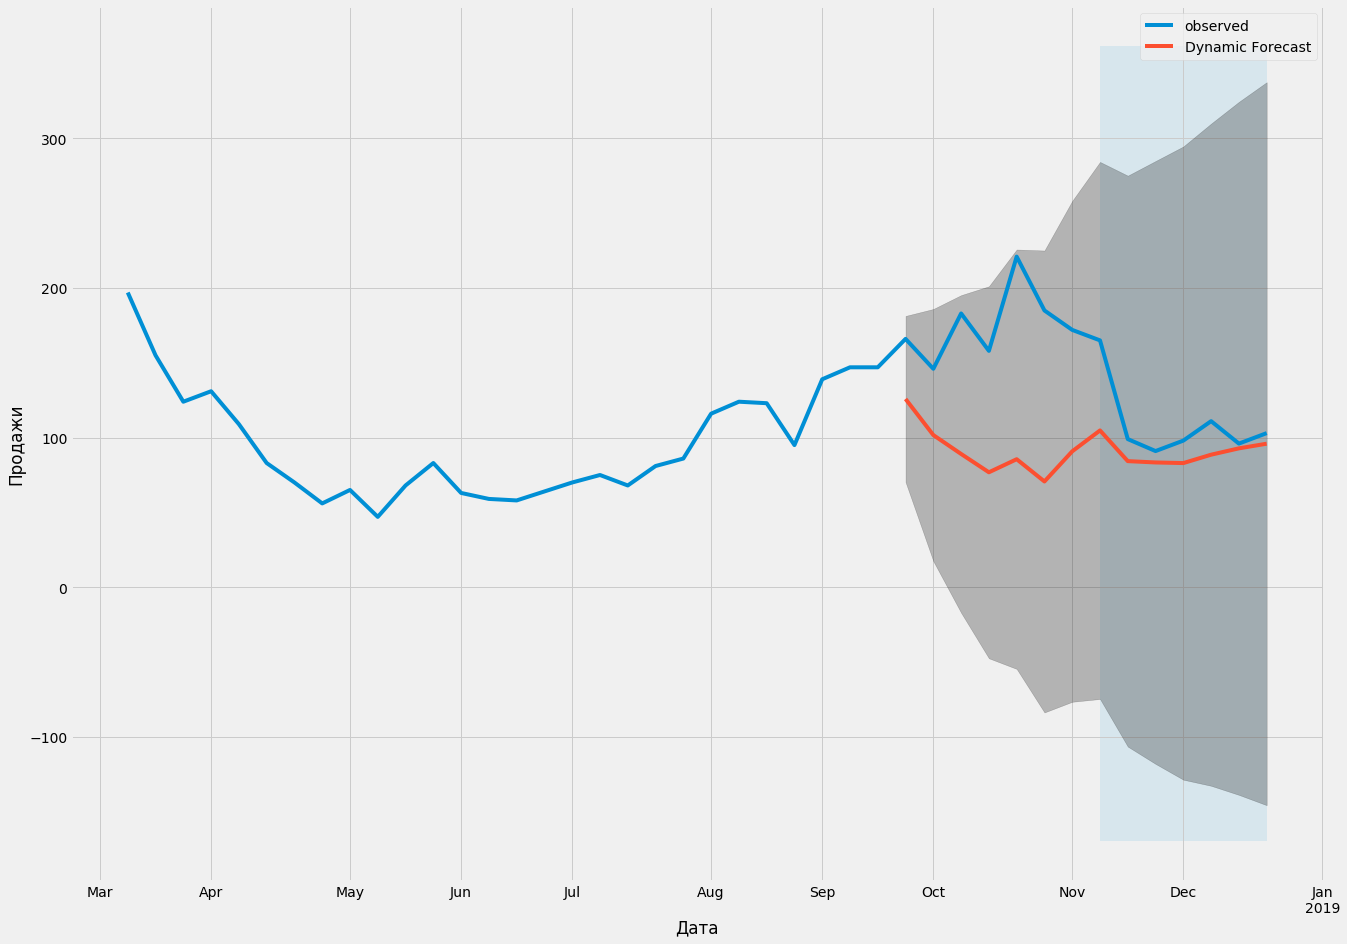

In [53]:
ax = y['2018':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-11-12'), y.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('Дата')
ax.set_ylabel('Продажи')
plt.legend()
plt.show()

In [54]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2018-11-12':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Среднеквадратическая ошибка {}'.format(round(mse, 2)))

The Mean Squared Error 669.91


### Прогнозируем на необходимый для нас период, то есть на 10 шагов вперёд

In [56]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

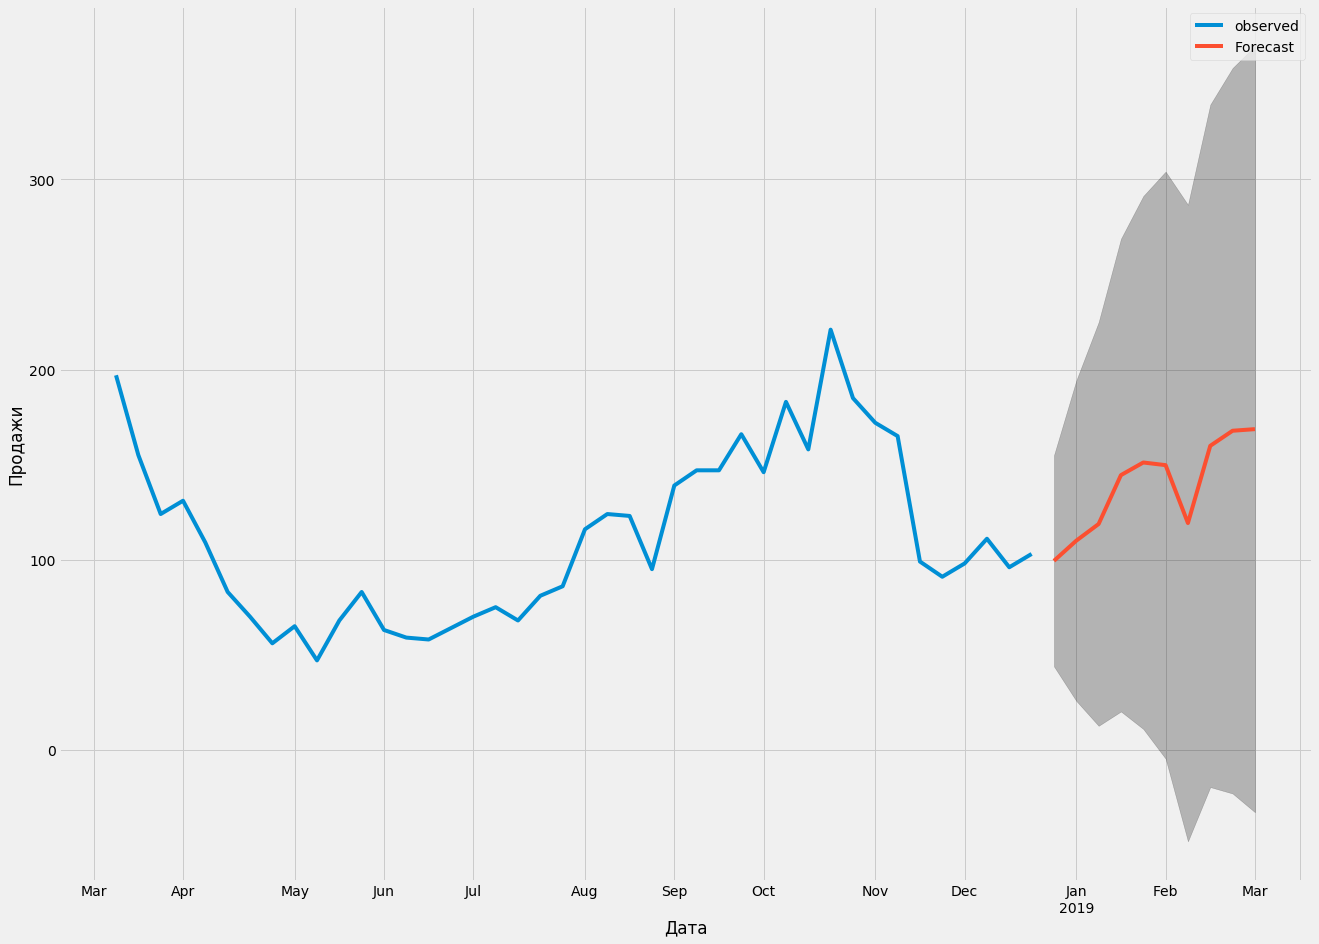

In [57]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Дата')
ax.set_ylabel('Продажи')
plt.legend()
plt.show()

### Спрогнозировали интервал значений

In [58]:
pred_ci

,lower sales,upper sales
2018-12-31,43.865959,154.877515
2019-01-07,25.695845,194.264013
2019-01-14,12.586934,224.920438
2019-01-21,20.135435,268.810344
2019-01-28,10.927796,291.293313
2019-02-04,-4.690612,304.133182
2019-02-11,-48.180601,286.692049
2019-02-18,-19.636509,339.400094
2019-02-25,-23.019983,358.653802
2019-03-04,-32.860373,370.181157


In [60]:
pred_ci_avg = pred_ci[['upper sales', 'lower sales']].mean(axis=1)

In [61]:
pred_ci_avg

2018-12-31     99.371737
2019-01-07    109.979929
2019-01-14    118.753686
2019-01-21    144.472890
2019-01-28    151.110554
2019-02-04    149.721285
2019-02-11    119.255724
2019-02-18    159.881792
2019-02-25    167.816909
2019-03-04    168.660392
Freq: W-MON, dtype: float64

### Рассчитываем понедельный прогноз продаж на тестовый период

In [62]:
pred_ci_avg.astype(int)

2018-12-31     99
2019-01-07    109
2019-01-14    118
2019-01-21    144
2019-01-28    151
2019-02-04    149
2019-02-11    119
2019-02-18    159
2019-02-25    167
2019-03-04    168
Freq: W-MON, dtype: int32